/home/kotya/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (7,8,18,25) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/kotya/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


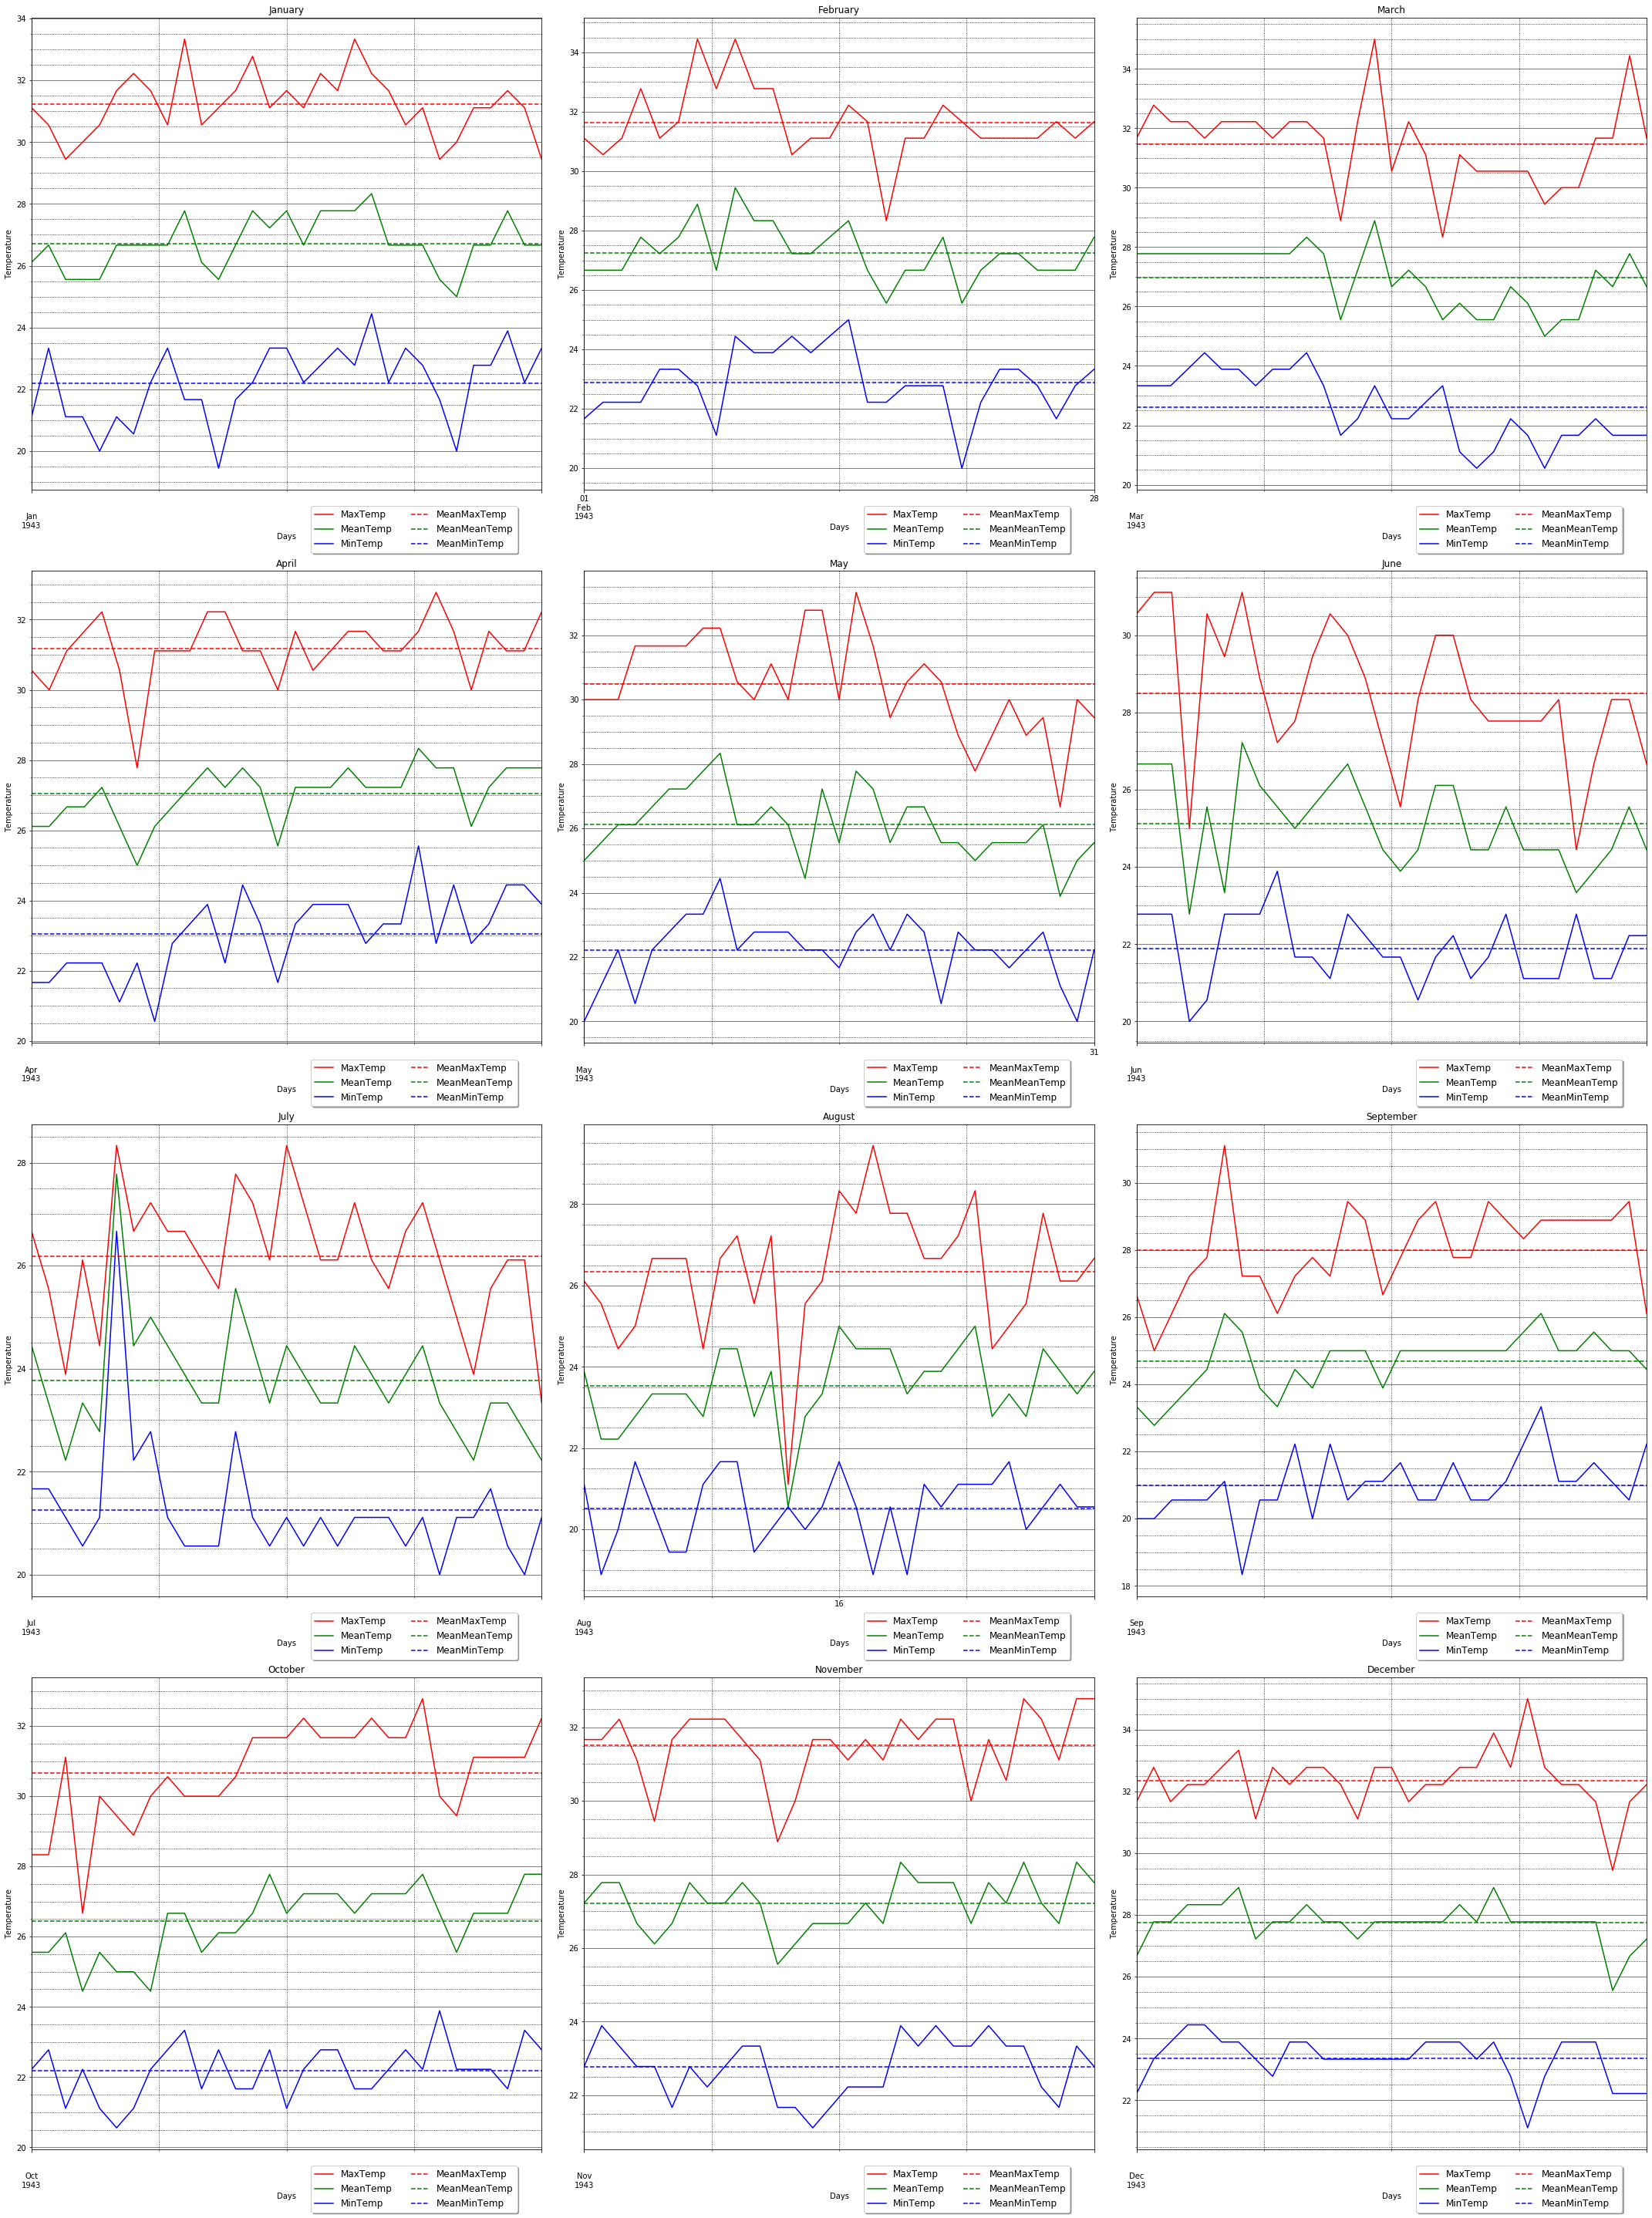

In [11]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
import numpy as np
import pandas as pd
import datetime

url = "Summary of Weather.csv"
df = pd.read_csv(url)

df['Date'] = df['Date'].map(lambda x: datetime.date(datetime.datetime.strptime(str(x), '%Y-%m-%d').year, 
													datetime.datetime.strptime(str(x), '%Y-%m-%d').month,
													datetime.datetime.strptime(str(x), '%Y-%m-%d').day))

dfYear = pd.DataFrame()
dfMonths = pd.DataFrame()

dfYear = df.loc[(df['Date']>=datetime.date(1943,1,1)) & (df['Date']<datetime.date(1944,1,1))] #get 1943 year
dfYear['Date']= pd.to_datetime(dfYear['Date']) 
dfYear = dfYear.loc[dfYear['STA']==10001] #get station 10001

fig = plt.figure(figsize=(30,40))
font = font_manager.FontProperties(size=12)

for i in range(1,13):	
	dfMonths = dfYear.loc[dfYear['Date'].dt.month == i]

	axes = fig.add_subplot(4,3,i)
	axes.title.set_text(str(dfMonths['Date'].iloc[0].month_name()))

	dfMonths.plot(x='Date', y='MaxTemp', ax=axes, color='r')
	dfMonths.plot(x='Date', y='MeanTemp', ax=axes, color='g');
	dfMonths.plot(x='Date', y='MinTemp', ax=axes, color='b');

	plt.axhline(y=dfMonths['MaxTemp'].mean(),color='r', ls='--', label='MeanMaxTemp');
	plt.axhline(y=dfMonths['MeanTemp'].mean(),color='g', ls='--', label='MeanMeanTemp');
	plt.axhline(y=dfMonths['MinTemp'].mean(),color='b', ls='--', label='MeanMinTemp');

	plt.ylabel('Temperature')
	plt.xlabel('Days')
	handles, _ = axes.get_legend_handles_labels()
	plt.legend(handles = handles[1:])
	plt.legend(loc='upper center', bbox_to_anchor=(0.75, -0.025),shadow=True, ncol=2, prop=font)

	plt.minorticks_on()
	plt.grid(which='major',
        color = 'k', 
        linewidth = 0.5)
	plt.grid(which='minor', 
        color = 'k', 
        linestyle = ':')


fig.tight_layout()
plt.show()
	
